# EDA and Data Preprocessing

This notebook covers the exploratory data analysis and preprocessing steps for the sentiment analysis project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Load Dataset

In [2]:
df = pd.read_csv('synthetic_social_media_data.csv')
df.head()

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,989e855d-a800-41d2-8f1d-e4df5f1e6a74,I was outstanding in this match,Positive,817,35,106,9367,2025-03-12 17:17:44,text,en
1,e9d98a2c-080d-4c36-b8d1-1f38cec9d9ad,"The product is unchanged, nothing special.",Neutral,944,19,90,5517,2025-01-03 17:17:44,video,en
2,0c62dfe1-d6f1-409b-91bb-6a36f56ad4b8,I am so brilliant with my purchase!,Positive,233,216,85,157,2025-08-01 17:17:44,image,en
3,c334a709-345a-4c23-b588-0629d6a1f501,"The product is moderate, nothing special.",Neutral,263,479,157,2065,2025-09-30 17:17:44,text,en
4,6175bbb9-9638-4545-9322-d9370c7e5b60,I am so awesome with my purchase!,Positive,45,56,55,4142,2025-10-03 17:17:44,image,en


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              3000 non-null   object
 1   Post Content         3000 non-null   object
 2   Sentiment Label      3000 non-null   object
 3   Number of Likes      3000 non-null   int64 
 4   Number of Shares     3000 non-null   int64 
 5   Number of Comments   3000 non-null   int64 
 6   User Follower Count  3000 non-null   int64 
 7   Post Date and Time   3000 non-null   object
 8   Post Type            3000 non-null   object
 9   Language             3000 non-null   object
dtypes: int64(4), object(6)
memory usage: 234.5+ KB


## 2. Exploratory Data Analysis

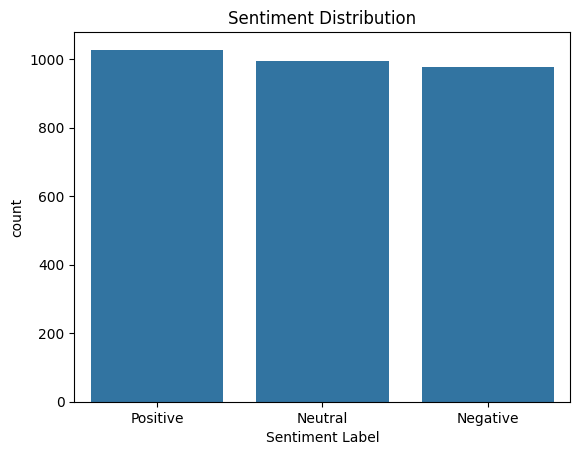

In [4]:
# Check class distribution
sns.countplot(x='Sentiment Label', data=df)
plt.title('Sentiment Distribution')
plt.show()

## 3. Data Cleaning

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

df['cleaned_text'] = df['Post Content'].apply(clean_text)

## 4. Feature Extraction (TF-IDF)

In [6]:
X = df['cleaned_text']
y = df['Sentiment Label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# TF-IDF Vectorization
# Using n-grams (1,2) to capture more context which might help with accuracy
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (3000, 1890)


## 5. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (2400, 1890)
Test set size: (600, 1890)


## 6. Save Processed Data

In [8]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Data and objects saved successfully.")

Data and objects saved successfully.
